In [ ]:
#|export
from __future__ import annotations
import random,math,torch,numpy as np,matplotlib.pyplot as plt
import fastcore.all as fc
from functools import partial

from n_framework import *
from learner_module import *

In [ ]:
import torch.nn.functional as F,matplotlib as mpl
from pathlib import Path
from operator import attrgetter,itemgetter
from contextlib import contextmanager

from torch import tensor,nn,optim
import torchvision.transforms.functional as TF
from datasets import load_dataset
from torcheval.metrics import MulticlassAccuracy
from fastcore.test import test_close

torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
mpl.rcParams['figure.constrained_layout.use'] = True

import logging
logging.disable(logging.WARNING)

In [ ]:
from collections.abc import Mapping
from operator import attrgetter
from functools import partial
from copy import copy

In [ ]:
def set_seed(seed, deterministic=False):
    torch.use_deterministic_algorithms(deterministic)
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

In [ ]:
x,y = 'image','label'
name = "fashion_mnist"
dsd = load_dataset(name)
bs = 1024

@inplace
def transformi(b): b[x] = [TF.to_tensor(o) for o in b[x]]

tds = dsd.with_transform(transformi)
dls = DataLoaders.from_dd(tds, bs)
dt = dls.train

  0%|          | 0/2 [00:00<?, ?it/s]

## Baseline

In [ ]:
def conv(ni,nf,ks=3,act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

def cnn_layers():
    return [ 
        conv(1,8, ks=5),  #14x14
        conv(8,16),       #7x7
        conv(16,32),      #4x4
        conv(32,64),      #2x2
        conv(64,10,act=False), #1x1
        nn.Flatten()]

In [ ]:
metrics = MetricsCB(accuracy=MulticlassAccuracy())
cbs = [TrainCB(),DeviceCB(),metrics, ProgressCB(plot=True)]

In [ ]:
def fit(model,epochs=1,xtra_cbs=None):
    learn = Learner(model,dls,loss_func=F.cross_entropy,lr=0.6,cbs=cbs)
    learn.fit(epochs)
    return learn

accuracy,loss,epoch,train
0.205,2.233,0,train
0.100,2.302,0,eval


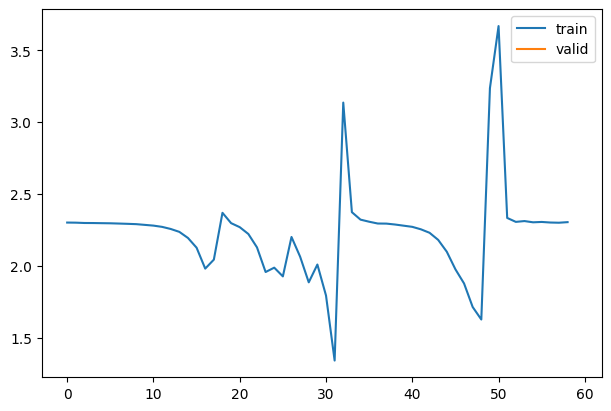

In [ ]:
set_seed(1)
learn = fit(nn.Sequential(*cnn_layers()))